<a href="https://colab.research.google.com/github/Yewuhala/5E-Introduction-to-AI-Course_2025/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 雪崩予測用SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# データのアップロード

In [ ]:
df = pd.read_csv('avalanche_dataset.csv')
X = df.drop('Avalanche_risk', axis=1)
y = df['Avalanche_risk']

# データの前処理

In [ ]:
if 'Aspect' in X.columns:
    X['Aspect_sin'] = np.sin(np.radians(X['Aspect']))
    X['Aspect_cos'] = np.cos(np.radians(X['Aspect']))
    X = X.drop('Aspect', axis=1)

# データの分割

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 重要：SVMはスケーリングが必要


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVMの学習（非線形データ用RBFカーネル）



In [ ]:
svm_model = SVC(
    kernel='rbf',           # Non-linear kernel/非線形カーネルを使用
    C=1.0,                  # Regularization parameter/正則化パラメータ(c)
    gamma='scale',          # Kernel coefficient/カーネル係数(gamma)
    probability=True,       # Enable probability estimates/確率推定を有効化する
    random_state=42,
    class_weight='balanced' # Handle class imbalance/クラス不均衡を考慮
)
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

# テスト予測（Predictions）

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# 評価（Evaluation）

In [ ]:
print("="*50)
print("SVM MODEL PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_svm):.3f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM MODEL PERFORMANCE
Accuracy: 0.833
ROC-AUC: 0.936

Confusion Matrix:
[[39 10]
 [ 5 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        49
           1       0.78      0.88      0.83        41

    accuracy                           0.83        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90



# 可視化（Visualization）

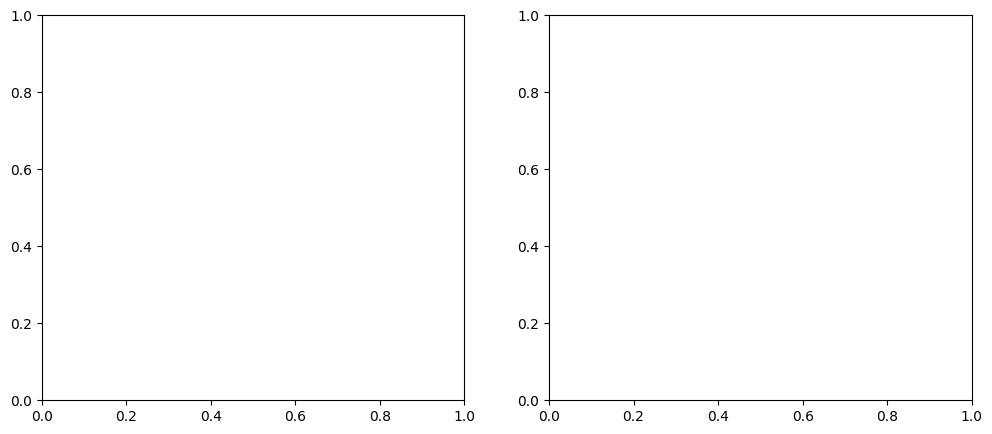

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 分類結果の混同行列

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
axes[0].imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Reds)
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xticks([0,1]); axes[0].set_yticks([0,1])
axes[0].set_xticklabels(['No', 'Yes']); axes[0].set_yticklabels(['No', 'Yes'])
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm_svm[i, j], ha='center', va='center',
                    color='white' if cm_svm[i,j] > cm_svm.max()/2 else 'black')

# ROC曲線による性能評価

In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
axes[1].plot(fpr_svm, tpr_svm, color='darkred', label=f'SVM (AUC = {roc_auc_svm:.3f})')
axes[1].plot([0,1], [0,1], color='navy', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('SVM ROC Curve')
axes[1].legend()
axes[1].grid(alpha=0.3)
plt.suptitle('Support Vector Machine - Avalanche Risk Prediction', fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>